# Observation of absorption effect

The effect is presented with the model :

$$\frac{\partial E}{\partial z} = - \frac{\sigma}{2}(1 + i\omega\tau)\rho E  $$

In this case, we can obtain the analytical solution by integrating the equation. With the analytical solution, like our study of other effect, we want to verify that the numerical solution obtained is good enough to use in split method when we solve the equation with all the effect.

The analytical solution :




## Comparaison between analytical and numrical solution

Position: z =  0.0
Mean:  (1+0j)
Standard deviation:  4.2073750163139715e-17
------------
Position: z =  0.6
Mean:  (0.9999999999999916+2.9535934200889326e-122j)
Standard deviation:  5.854221566501831e-14
------------
Position: z =  0.83
Mean:  (0.9999999999999885+4.085804231122398e-122j)
Standard deviation:  8.067154896875844e-14
------------
Position: z =  1.0
Mean:  (0.9999999999999859+4.92265570014685e-122j)
Standard deviation:  9.877688890483666e-14
------------


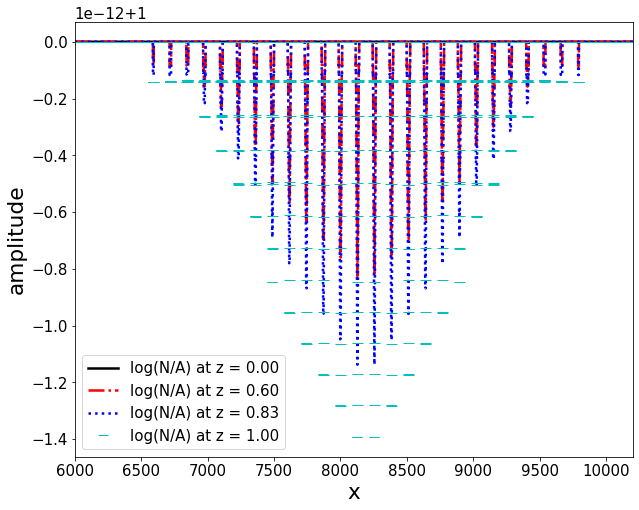

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#Zoom the figure in matplotlib
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['font.size'] = 15
mpl.rcParams['axes.labelsize'] = 'x-large'
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['lines.markersize'] = 10.0

#Parameters for initialize laser
w0 = 0.7*1e-3
Pcr = 1.7*1e9
p = 4
Pin = p*Pcr
lamb = 790*1e-9
k = 2*np.pi/lamb
beta = 6.5*1e-104
K = 7
cross = 5.1*1e-24 
light = 3*1e8
omega = 2*np.pi*light/lamb
tau = 3.5*1e-13
hbar = 6.62*1e-34/np.pi
tp = 85*1e-15
const1 = -cross/2*(1 + 1j*omega*tau)*beta/(K*hbar*omega)*tp*(np.pi/8*K)**(1/2)

#spacial discretization along x and y, need to be the same as production codes
L = 16*1e-4
N = 64
Lz = 2.0
Nz = 1000
saved_Nz = 101
r, d = np.linspace(-L, L, 2*N, retstep=True) 
x, y = np.meshgrid(r,r)

#Numerical solution
inten_num = np.loadtxt("../results/intensity_plasma.txt")
inten_num = inten_num.reshape((saved_Nz, 2*N, 2*N))

#Analytical solution 
I0 = inten_num[0]      #I0: I at z = 0
inten_analy = lambda z : I0*(1 - 2*K*const1*I0**(K)*z)**(-1/K)

z_interested = np.array([0, 0.6, 0.83, Lz-1])
pos_interested = z_interested*saved_Nz/Lz
pos_interested = pos_interested.astype(int)
colors = ['k-', 'r-.', 'b:', 'c_']

for i in range(4):
    A = (inten_num[pos_interested[i]]/inten_analy(z_interested[i])).flatten()
    print("Position: z = ",  z_interested[i])
    print("Mean: ", np.mean(A))
    print("Standard deviation: ", np.std(A))
    print("------------")
    x = np.linspace(0, 4*N**2, 4*N**2)
    plt.plot(x, A, colors[i], label = 'log(N/A) at z = %.2f' %z_interested[i])

plt.xlabel('x')
plt.ylabel('amplitude')
plt.xlim(6000, 10200)
#plt.ylim(-1.51e-9, 0.51e-9)
plt.legend()
plt.show()

# save figure as pdf
#plt.savefig("../figures/observables.pdf")

# Plot energy

(101,)


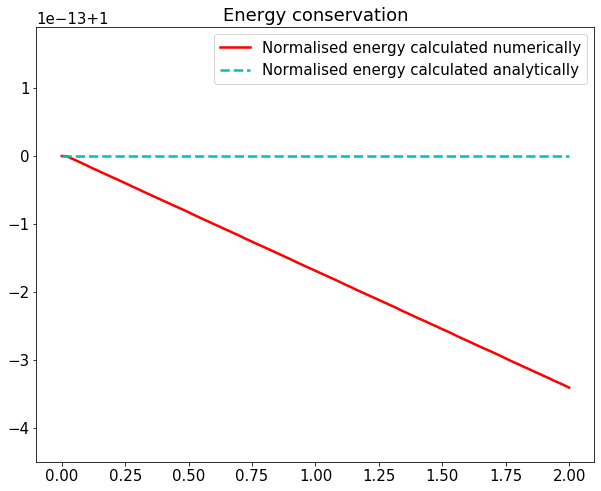

In [8]:
z = np.linspace(0, Lz, saved_Nz )

Energ_num = []
Energ_analy = []
for idx, inten in enumerate(inten_num):
    Energ_num.append(np.sum(inten))
    Energ_analy.append(np.sum(inten_analy(z[idx])))
Energ_num = np.asarray(Energ_num)
Energ_analy = np.asarray(Energ_analy)

pos = z*saved_Nz/Lz
pos = pos.astype(int)

plt.plot(z, Energ_num/Energ_num[0], 'r', label='Normalised energy calculated numerically')
#the intensity is maximum at x=y=0
plt.plot(z, Energ_analy/Energ_analy[0], 'c--', label='Normalised energy calculated analytically')

plt.title('Energy conservation')
plt.legend(fontsize='medium')
plt.ylim(0.99999999999955,1.00000000000019)
plt.show()